# Regularização

## O que é?

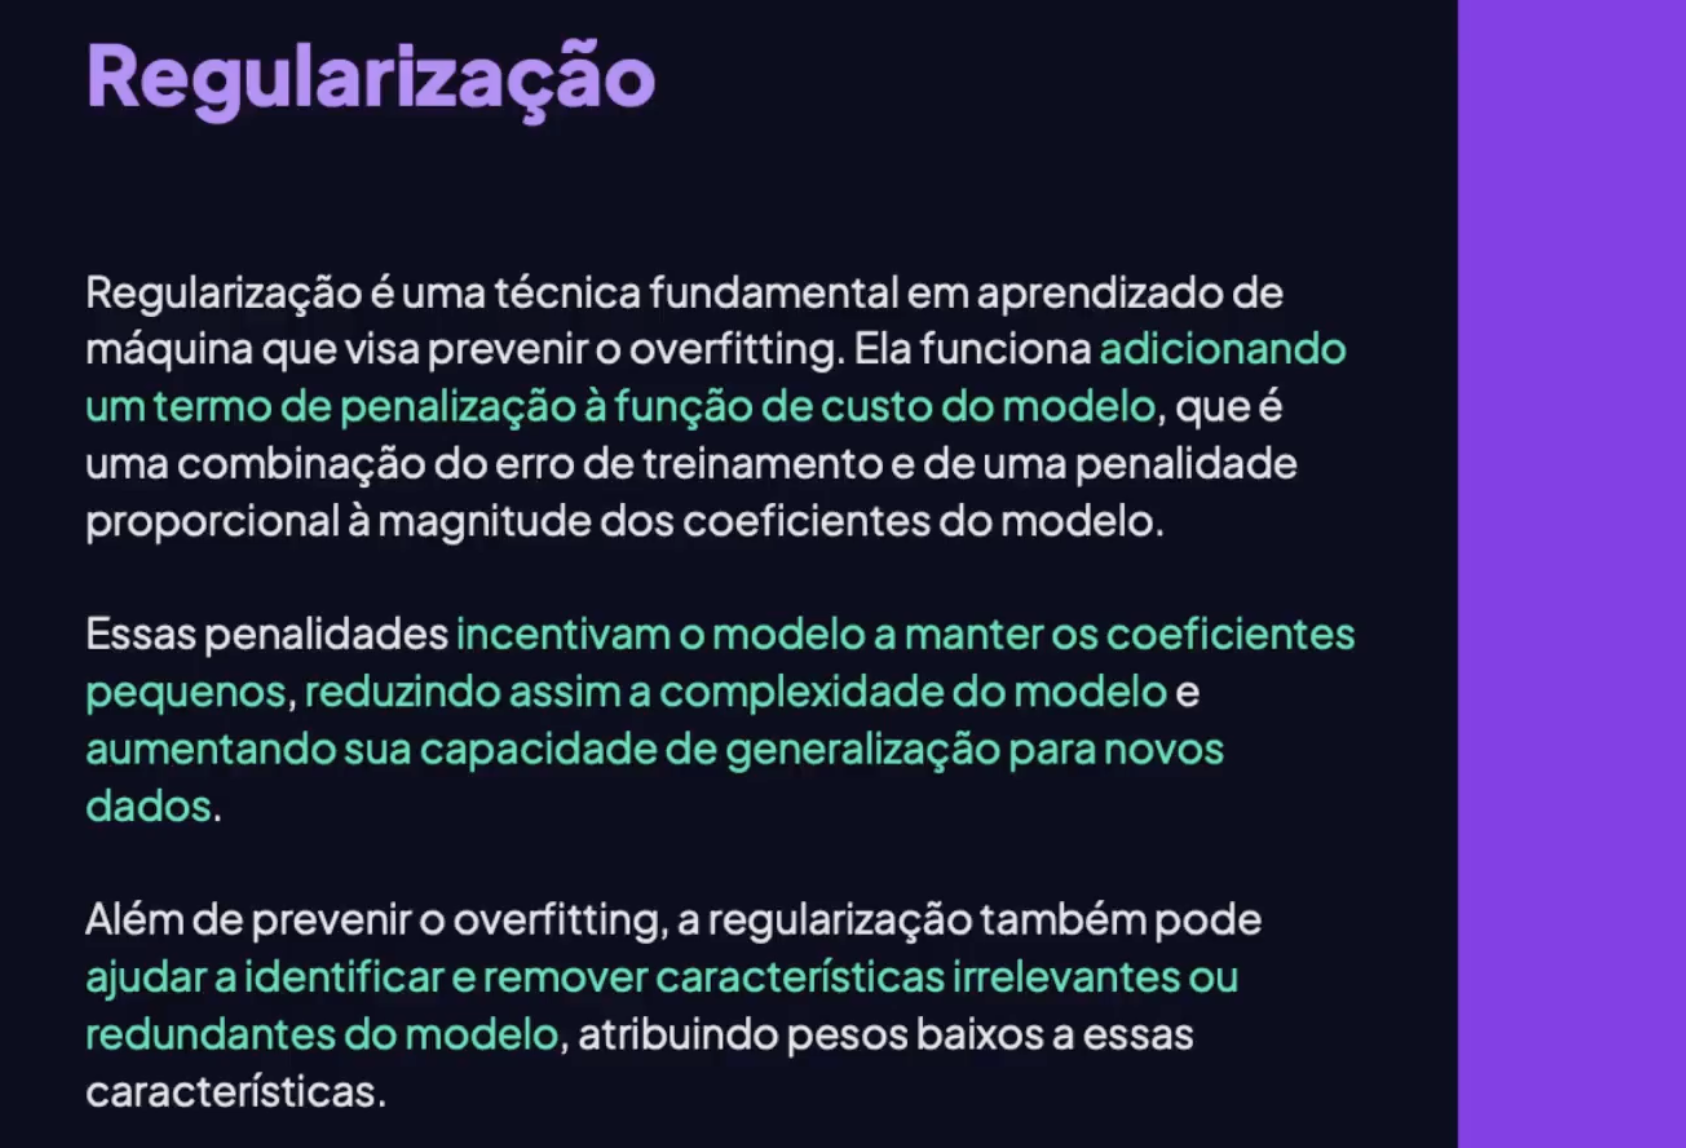

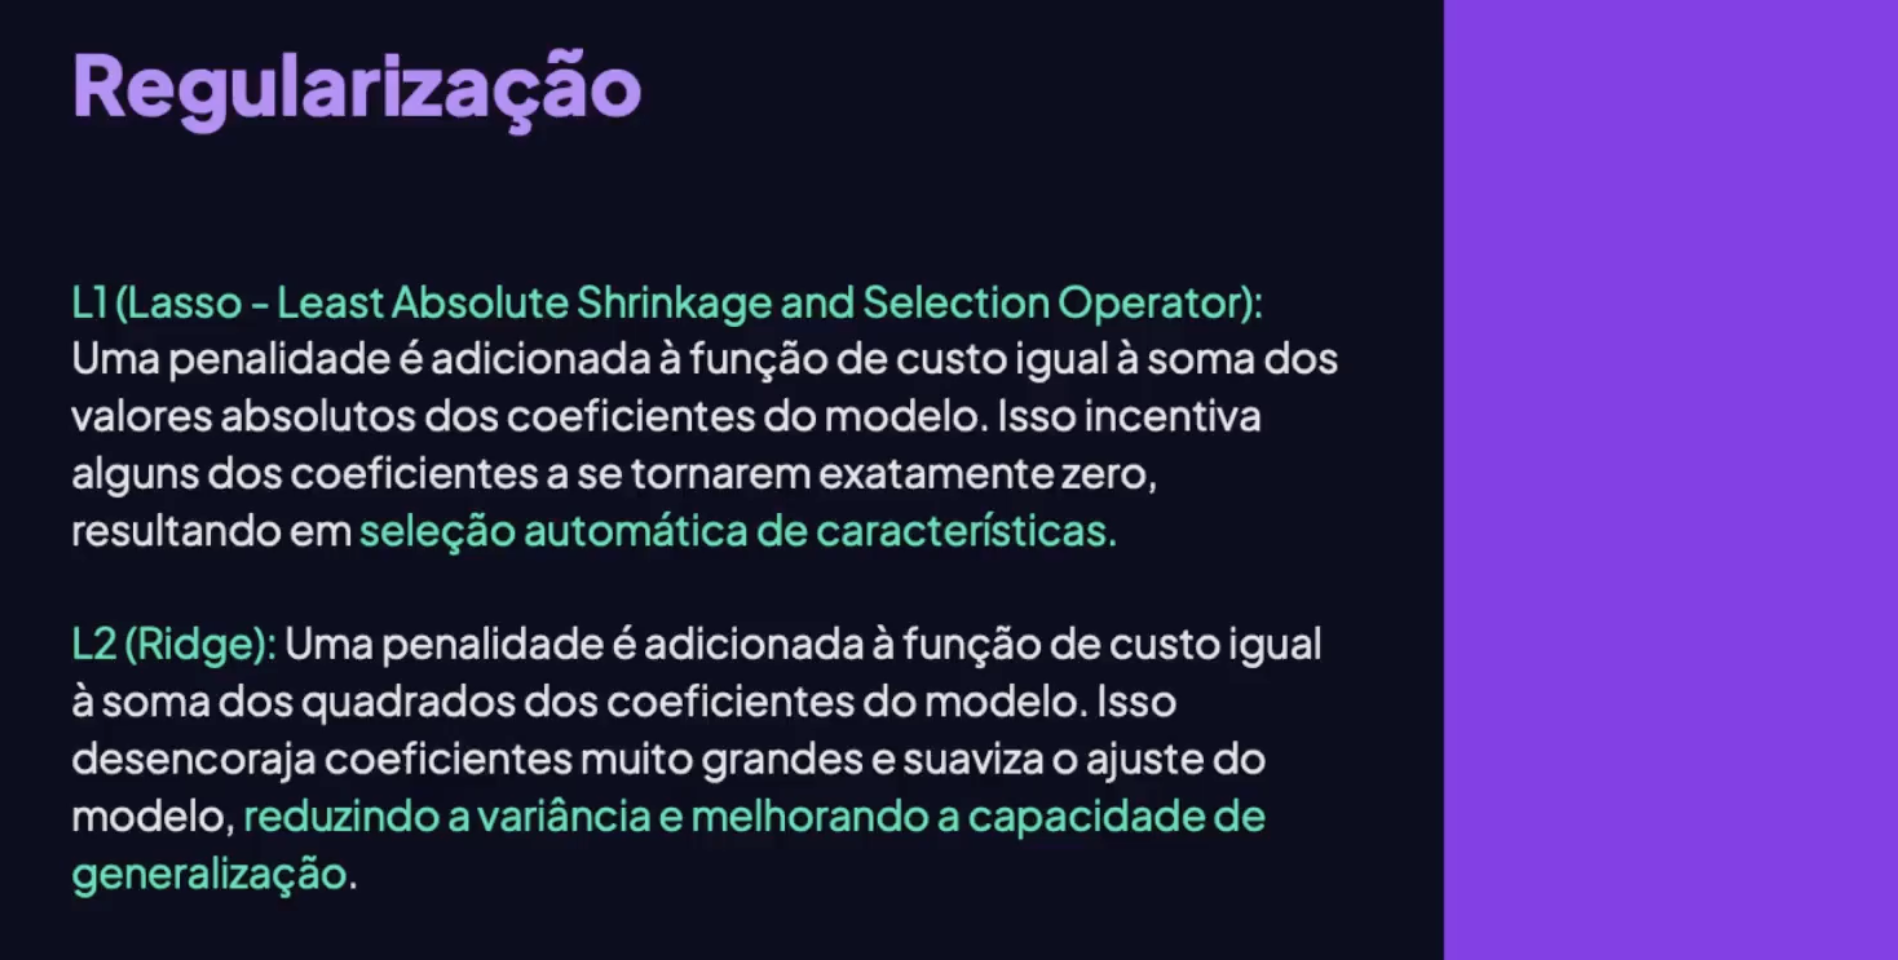

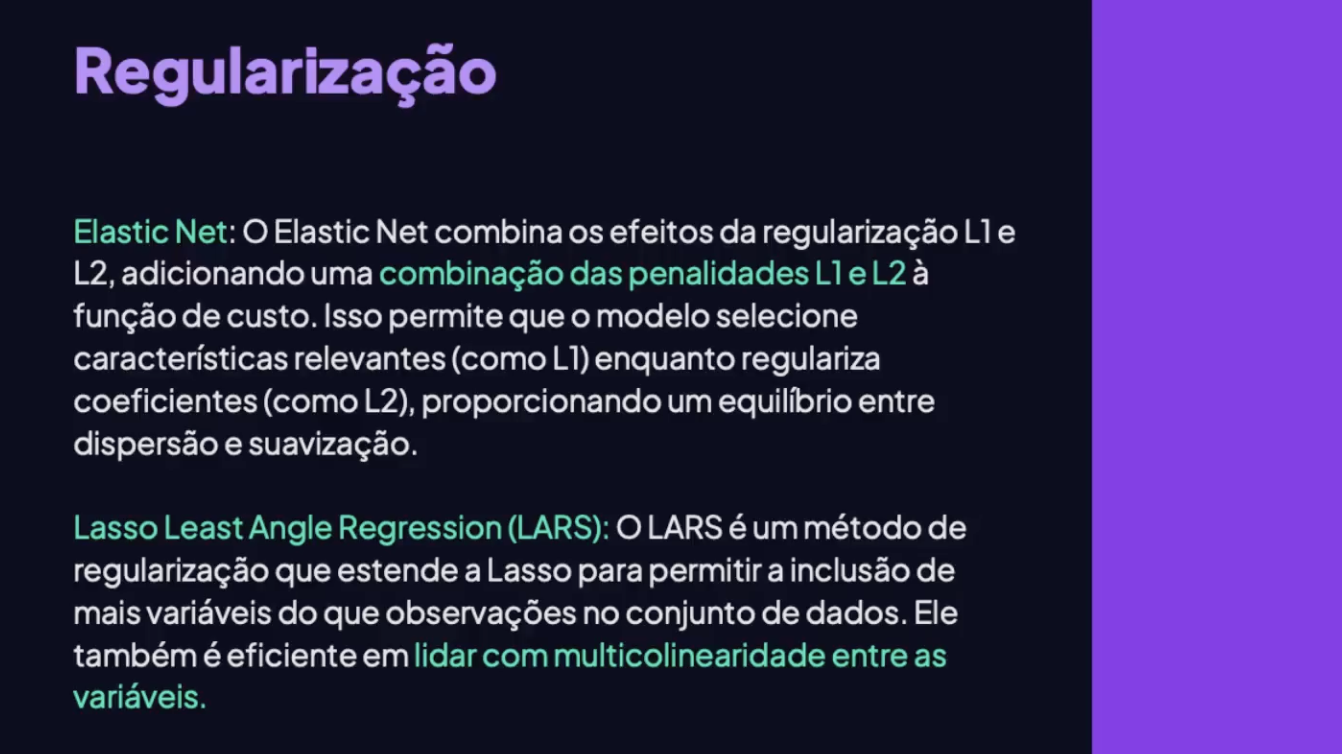

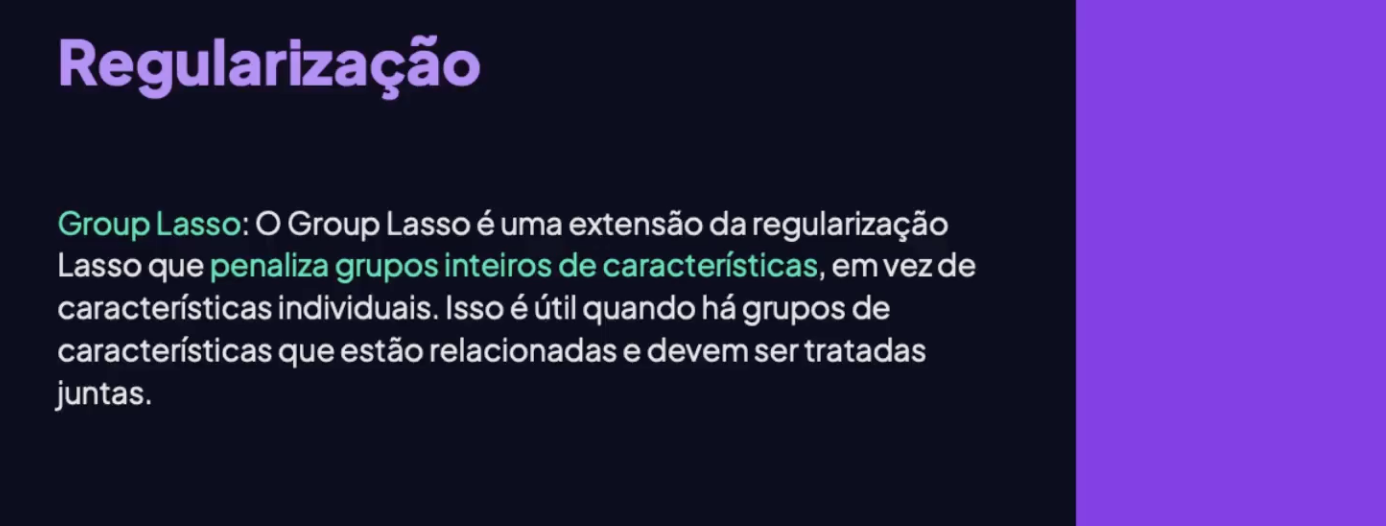

## Importações

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

import numpy as np

## Regressão

### Carregamento do dataset

In [3]:
df_colesterol = pd.read_csv('./dataset/colesterol.csv')

In [4]:
# Transformar variaveis categóricas em numéricas
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

df_colesterol = pd.get_dummies(df_colesterol, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

df_colesterol.head(10)

Idade   Peso  Altura  Colesterol  Grupo Sanguíneo_A  Grupo Sanguíneo_AB  \
0     33   85.1     186      199.63              False               False   
1     68  105.0     184      236.98               True               False   
2     25   64.8     180      161.79              False               False   
3     43  120.2     167      336.24               True               False   
4     79   88.5     175      226.23              False                True   
5     68   66.8     170      185.31              False               False   
6     60  117.3     181      289.33               True               False   
7     35   86.9     174      216.48              False               False   
8     62   81.3     166      235.30              False               False   
9     44   32.7     165       97.79              False               False   

   Grupo Sanguíneo_B  Grupo Sanguíneo_O  Fumante_Não  Fumante_Sim  \
0               True              False        False         True   
1              False              False         True        False   
2              False               True         True        False   
3              False              False         True        False   
4              False              False         True        False   
5               True              False         True        False   
6              False              False        False         True   
7              False               True        False         True   
8              False               True         True        False   
9               True              False        False         True   

   Nível de Atividade_Alto  Nível de Atividade_Baixo  \
0                    False                      True   
1                    False                     False   
2                     True                     False   
3                     True                     False   
4                    False                      True   
5                    False                      True   
6                    False                      True   
7                    False                     False   
8                    False                      True   
9                     True                     False   

   Nível de Atividade_Moderado  
0                        False  
1                         True  
2                        False  
3                        False  
4                        False  
5                        False  
6                        False  
7                         True  
8                        False  
9                        False

### Treinar modelo de regressão com Lasso (L1)

In [5]:
# Separar X e y
X = df_colesterol.drop(columns=['Colesterol'])
y = df_colesterol['Colesterol']

In [6]:
# Separar modelo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [7]:
# Treinar modelo de regressão linear com Lasso
# Lasso é um modelo de regressão linear com penalidade L1
# A penalidade L1 faz com que o modelo selecione apenas um subconjunto das variáveis
# O parâmetro alpha controla a força da penalidade
# Quanto maior o alpha, maior a penalidade e menos variáveis serão selecionadas
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [8]:
def feature_importance(model):
		# Calcular a importância das variáveis
		importances = np.abs(model.coef_)
		
		print('Importancia das features:')

		for i, feature in enumerate(model.feature_names_in_):
			print(f'{feature}: {importances[i]}')

In [9]:
# Importância das features - Model Lasso
feature_importance(model_lasso)

Importancia das features:
Idade: 0.017349176463551177
Peso: 2.4911793204672494
Altura: 2.2086319191367187
Grupo Sanguíneo_A: 0.050636773311815896
Grupo Sanguíneo_AB: 1.0329018969589854
Grupo Sanguíneo_B: 0.0
Grupo Sanguíneo_O: 0.0
Fumante_Não: 1.6422787796521032
Fumante_Sim: 0.0
Nível de Atividade_Alto: 1.4853098596789283
Nível de Atividade_Baixo: 0.0
Nível de Atividade_Moderado: 0.17448169861079757


In [10]:
def show_performance(model, X_test, y_test):
  # Fazer previsões com o modelo
	y_pred = model.predict(X_test)
	
	# Avaliar o desempenho do modelo
	return root_mean_squared_error(y_test, y_pred)

In [11]:
show_performance(model_lasso, X_test, y_test)

np.float64(8.966234714378682)

### Treinar modelo de regressão com LassoCV

In [25]:
# Treinar modelo com RidgeCV
# RidgeCV é uma versão do Ridge que faz validação cruzada para selecionar o melhor valor de alpha
model_lasso_cv = LassoCV(alphas=[0.1, 0.5, 1], cv=5, random_state=51)
model_lasso_cv.fit(X, y)

LassoCV(alphas=[0.1, 0.5, 1], cv=5, random_state=51)

In [26]:
feature_importance(model_lasso_cv)

Importancia das features:
Idade: 0.01754486106573827
Peso: 2.4847665015936133
Altura: 2.199233004768637
Grupo Sanguíneo_A: 0.0
Grupo Sanguíneo_AB: 1.741223017831779
Grupo Sanguíneo_B: 0.0
Grupo Sanguíneo_O: 0.0
Fumante_Não: 1.8358701056169318
Fumante_Sim: 0.0
Nível de Atividade_Alto: 0.6961424797287821
Nível de Atividade_Baixo: 0.17642514217590244
Nível de Atividade_Moderado: 0.0


In [27]:
show_performance(model_lasso_cv, X_test, y_test)

np.float64(8.872879747160335)

### Treinar modelo de regressão com Ridge (L2)

In [18]:
# Treinar modelo de regressão linear com Ridge
# Ridge é um modelo de regressão linear com penalidade L2
# A penalidade L2 faz com que o modelo reduza os coeficientes das variáveis, mas não as zere
# O parâmetro alpha controla a força da penalidade
# Quanto maior o alpha, maior a penalidade e menores os coeficientes das variáveis
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [19]:
# Importância das features - Model Ridge
feature_importance(model_ridge)

Importancia das features:
Idade: 0.014856795381590106
Peso: 2.4863676267885975
Altura: 2.205208636694231
Grupo Sanguíneo_A: 0.6068720485495902
Grupo Sanguíneo_AB: 1.24299533713293
Grupo Sanguíneo_B: 0.8279752477144121
Grupo Sanguíneo_O: 0.1918519591573822
Fumante_Não: 1.074368913731751
Fumante_Sim: 1.0743689137720926
Nível de Atividade_Alto: 1.419737217477321
Nível de Atividade_Baixo: 0.42678204860920965
Nível de Atividade_Moderado: 0.9929551688905746


In [20]:
show_performance(model_ridge, X_test, y_test)

np.float64(9.017609728696328)

### Treinar modelo de regressão com RidgeCV

In [22]:
# Treinar modelo com RidgeCV
# RidgeCV é uma versão do Ridge que faz validação cruzada para selecionar o melhor valor de alpha
model_ridge_cv = RidgeCV(alphas=[0.1, 0.5, 1], cv=5)
model_ridge_cv.fit(X, y)

RidgeCV(alphas=[0.1, 0.5, 1], cv=5)

In [23]:
feature_importance(model_ridge_cv)

Importancia das features:
Idade: 0.01681472590019532
Peso: 2.474198310917941
Altura: 2.1905048137807497
Grupo Sanguíneo_A: 0.5897962408332681
Grupo Sanguíneo_AB: 1.6514464168702392
Grupo Sanguíneo_B: 0.46332107433590947
Grupo Sanguíneo_O: 0.5983291016968529
Fumante_Não: 1.1564340048556552
Fumante_Sim: 1.1564340048613404
Nível de Atividade_Alto: 0.8729024851239743
Nível de Atividade_Baixo: 0.6466155189942042
Nível de Atividade_Moderado: 0.2262869661190167


In [24]:
show_performance(model_ridge_cv, X_test, y_test)

np.float64(8.84949826711917)